<a href="https://colab.research.google.com/github/zim10/Deep-learning-using-pytorch/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data: torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader
2. Build model (parameters): torch.nn, torch.nn.Module, torchvision.models, torch.optim, training and testing

3. evaluation: trochmetrics
4. improvement: through experimentation (torch.utils.tensorboard)
5. save and reload your trained model (torch.save, torch.load)

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(f"Pytorch version: : {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Pytorch version: : 1.13.0+cu116
torchvision version: 0.14.0+cu116


In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, 
    download = True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '0')

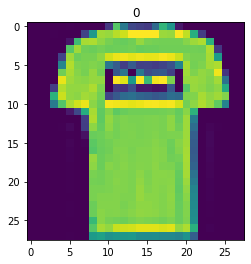

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[1]
#p = image.squeeze().shape
#print(p)
print(f"Image shape: {image.shape}")
#print(label)
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'T-shirt/top')

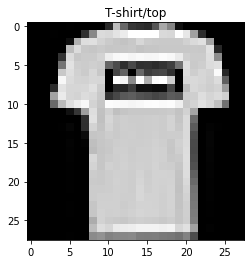

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


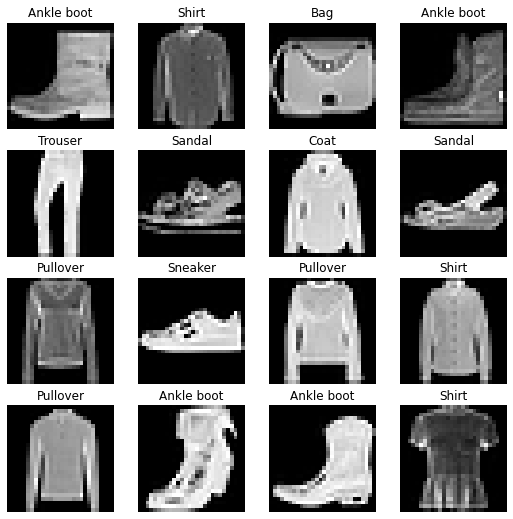

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols +1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f366295dcd0>, <torch.utils.data.dataloader.DataLoader object at 0x7f366295dc70>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
len(train_dataloader)

1875

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape, len(train_features_batch)

(torch.Size([32, 1, 28, 28]), torch.Size([32]), 32)

6
Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


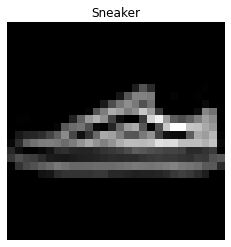

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
print(random_idx)
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
#model 0 build
class FashionMNISTModelV0(nn.Module):
   def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
     super().__init__()
     self.layer_stack = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=input_shape, out_features=hidden_units),
         nn.Linear(in_features=hidden_units, out_features=output_shape)
     )
   def forward(self, x):
       return self.layer_stack(x)
  

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              )

In [ ]:
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#loss, optimizer, evaluation metrics
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device:torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
#training loop
#loop through epochs
#loop through training batches, perform training steps, calculate the train loss per batch
#loop through testing batches, perform testing steps, calculate the test loss per batch
#print out what's happening

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs =3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n --------")
    train_loss = 0
    #training loop
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
           print(f" Looked at {batch * len(X)} /{len(train_dataloader.dataset)} samples")
    #print(y_pred)
    train_loss /= len(train_dataloader)
    #testing loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
         for X, y in test_dataloader:
             test_pred = model_0(X)
             test_loss += loss_fn(test_pred, y)
             test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
         test_loss /= len(test_dataloader)
         test_acc /= len(test_dataloader)
print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss: .5f}, Test acc: {test_acc: .2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 --------
 Looked at 0 /60000 samples
 Looked at 12800 /60000 samples
 Looked at 25600 /60000 samples
 Looked at 38400 /60000 samples
 Looked at 51200 /60000 samples
Epoch: 1 
 --------
 Looked at 0 /60000 samples
 Looked at 12800 /60000 samples
 Looked at 25600 /60000 samples
 Looked at 38400 /60000 samples
 Looked at 51200 /60000 samples
Epoch: 2 
 --------
 Looked at 0 /60000 samples
 Looked at 12800 /60000 samples
 Looked at 25600 /60000 samples
 Looked at 38400 /60000 samples
 Looked at 51200 /60000 samples

Train loss: 0.45503 | Test loss:  0.47664, Test acc:  83.43%

Train time on cpu: 22.388 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
          for X, y in data_loader:
              y_pred = model(X)
              loss += loss_fn(y_pred, y)
              acc += accuracy_fn(y_true=y,
                                 y_pred = y_pred.argmax(dim=1))
          loss /= len(data_loader)
          acc /= len(data_loader)
    return {"model_name:": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [ ]:
model_0_results = eval_model(model=model_0, data_loader = test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name:': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#dim=1 means row wise
#dim=0 means collum wise
import torch
a = torch.randn(4, 4)
a


tensor([[ 0.9007, -2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047,  1.7878, -0.4780],
        [-0.3925, -1.4036, -0.7279, -0.5594],
        [-0.7688,  0.7624, -1.5673, -0.2394]])

In [ ]:
torch.argmax(a, dim=1)

tensor([0, 2, 0, 1])

In [ ]:
torch.argmax(a, dim=0)

tensor([0, 3, 1, 3])

In [ ]:
#device agnostic-code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features= input_shape, out_features=hidden_units),
          nn.ReLU(),
          nn.Linear(in_features=hidden_units, out_features=output_shape),
          nn.ReLU()
      )
    def forward(self, x: torch.Tensor):
      return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units = 10,
                              output_shape = len(class_names)
                              ).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Functionizing training and test loops
# train loop function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred = y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss: {train_loss:.5f} | train accuracy: {train_acc:.2f}%")

#test loop function
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():

    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred = test_pred.argmax(dim=1)
                              )
    test_loss /= len(data_loader)
    test_acc /=len(data_loader)
    print(f"Test loss: {test_loss:.5f} | test accuracy: {test_acc: .2f}%\n")

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
          for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                 y_pred = y_pred.argmax(dim=1))
          loss /= len(data_loader)
          acc /= len(data_loader)
    return {"model_name:": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
torch.manual_seed(42)
#time measurement
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn)
    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
train loss: 1.09199 | train accuracy: 61.34%
Test loss: 0.95636 | test accuracy:  65.00%

Epoch: 1
-------
train loss: 0.78101 | train accuracy: 71.93%
Test loss: 0.72227 | test accuracy:  73.91%

Epoch: 2
-------
train loss: 0.67027 | train accuracy: 75.94%
Test loss: 0.68500 | test accuracy:  75.02%

Train time on cuda: 35.679 seconds


In [ ]:
#model eval
torch.manual_seed(42)
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results

{'model_name:': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
# Check baseline results
model_0_results

{'model_name:': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
# CNN model
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# know the shape, it will clear
import torch 
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"single image shape: {test_image.shape} -> [color_channels, height, width]")
#print(f"single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]


In [ ]:
from torch import nn
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

In [ ]:
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n --------")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device
             )
  test_step(model=model_2,
            data_loader= test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device
            )
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 --------
train loss: 0.59241 | train accuracy: 78.50%
Test loss: 0.39943 | test accuracy:  85.57%

Epoch: 1
 --------
train loss: 0.36087 | train accuracy: 86.97%
Test loss: 0.35742 | test accuracy:  86.67%

Epoch: 2
 --------
train loss: 0.32355 | train accuracy: 88.33%
Test loss: 0.32744 | test accuracy:  87.91%

Train time on cuda: 49.329 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name:': 'FashionMNISTModelV2',
 'model_loss': 0.32744142413139343,
 'model_acc': 87.90934504792332}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

In [ ]:
compare_results

,model_name:,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327441,87.909345


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [ ]:
compare_results

,model_name:,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,22.388271
1,FashionMNISTModelV1,0.685001,75.019968,35.679251
2,FashionMNISTModelV2,0.327441,87.909345,49.328668


Text(0, 0.5, 'model')

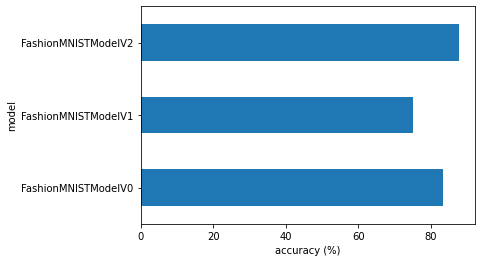

In [ ]:
compare_results.set_index("model_name:")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs) 

In [ ]:
import random
random.seed(4)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")
#print(test_samples[0])
#print(type(test_samples))

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 3 (Dress)


In [ ]:
# sample = torch.unsqueeze(test_samples[0], dim=0)
#sample.shape

In [ ]:
# pred_logit = make_predictions(model=model_2,
#                               data=test_samples)
# pred_logit[:2]

In [ ]:
# pred_class = pred_logit.argmax(dim=1)
# pred_class

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[5.2730e-04, 3.0970e-04, 9.9318e-06, 9.9837e-01, 6.2998e-04, 1.7011e-06,
         4.7946e-05, 6.2683e-05, 2.3676e-05, 1.5753e-05],
        [2.6681e-05, 7.9874e-07, 5.4870e-05, 2.6870e-02, 2.6916e-04, 1.3754e-03,
         2.4692e-04, 8.5995e-06, 9.7115e-01, 1.3883e-06]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 8, 5, 7, 7, 4, 3, 7, 6])

In [ ]:
test_labels, pred_classes

([3, 8, 5, 7, 7, 4, 3, 7, 4], tensor([3, 8, 5, 7, 7, 4, 3, 7, 6]))

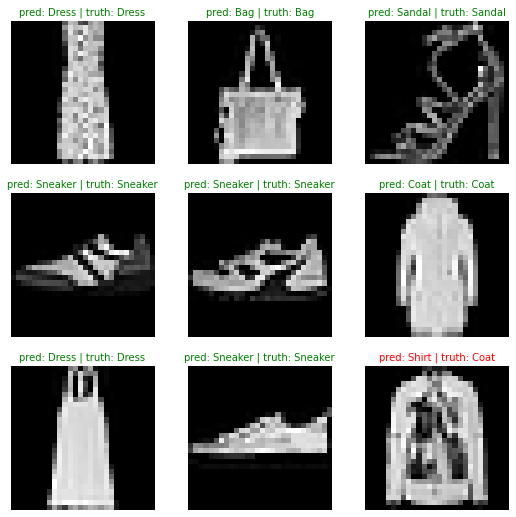

In [ ]:
#plot
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"pred: {pred_label} | truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False) 

In [ ]:
from tqdm.auto import tqdm
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.3 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [ ]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.21.0


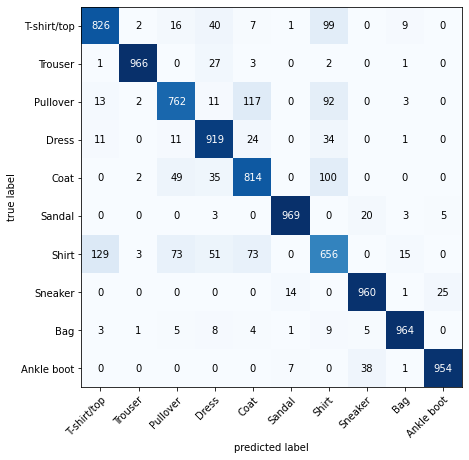

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize= (10,7)
)

In [ ]:
#save model
from pathlib import Path
Model_path = Path("models")
Model_path.mkdir(parents=True,
                 exist_ok = True)
Model_name = "03_pytorch_computer_vision_model_2.pth"
Model_save_path = Model_path / Model_name
print(f"Saving model to: {Model_save_path}")
torch.save(obj=model_2.state_dict(),
           f = Model_save_path)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
#load
loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units=10,
                                     output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=Model_save_path))
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

{'model_name:': 'FashionMNISTModelV2',
 'model_loss': 0.32744142413139343,
 'model_acc': 87.90934504792332}

In [ ]:
model_2_results

{'model_name:': 'FashionMNISTModelV2',
 'model_loss': 0.32744142413139343,
 'model_acc': 87.90934504792332}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08,
              rtol=0.0001)

tensor(True)